In [1]:
import importlib
import numpy as np
from fastapi import APIRouter, Depends, HTTPException
import glob
import pathlib
import zarr
import os
from pydantic import BaseModel
from typing import List, Optional
import matplotlib.pyplot as plt
# import napari

# Import db
from app import db_models
from app.database import SessionLocal, engine
import app.crud as crud

# Import classes
from app.api import classes_internal as c_int
from app.api import classes_db as c_db
from app.api import classes_com as c_com
from app.api import utils_com as utils_com
# from app.api import utils_classes as utils_classes
from app.api import utils_import
from app.api import utils_paths
from app.tests import utils_tests
from app.api import napari_viewer
from app.api import utils_segmentation_random_forest as utils_seg_rf

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [14]:
path =  r"F:\Data_Storage\AG_Rittner\Microscope Framework\data\fileserver_folder\_tmp\0_181129_NF200_CCI1w_05_01_20x1,5.oib"
# path = r"C:\Users\tlux1\Desktop\Data_RNAscope\Images_RNAscope_ADGRL1_3\NF200\CCI1w"

In [15]:
utils_import.read_image_file(path)

F:\Data_Storage\AG_Rittner\Microscope Framework\data\fileserver_folder\_tmp\0_181129_NF200_CCI1w_05_01_20x1,5.oib
F:/Data_Storage/AG_Rittner/Microscope Framework/data/fileserver_folder/_tmp/0_181129_NF200_CCI1w_05_01_20x1,5.oib


([(array([[[[1.05287251e-03, 1.51064317e-03, 1.12916762e-03, ...,
             1.34279393e-03, 1.72426947e-03, 1.32753490e-03],
            [1.05287251e-03, 1.70901045e-03, 1.20546273e-03, ...,
             1.57167925e-03, 1.51064317e-03, 1.17494469e-03],
            [1.03761349e-03, 1.14442664e-03, 1.11390860e-03, ...,
             2.16678111e-03, 1.67849241e-03, 1.28175784e-03],
            ...,
            [1.06813153e-03, 2.24307622e-03, 1.49538415e-03, ...,
             6.22568093e-03, 4.97444114e-03, 7.43114389e-03],
            [1.64797436e-03, 1.34279393e-03, 1.58693828e-03, ...,
             6.53086137e-03, 8.39246251e-03, 5.72213344e-03],
            [1.77004654e-03, 1.29701686e-03, 1.14442664e-03, ...,
             4.47089365e-03, 6.39353041e-03, 5.20332670e-03]],
   
           [[1.66323339e-03, 1.66323339e-03, 5.26436279e-03, ...,
             1.86160067e-03, 4.21149004e-03, 1.95315480e-03],
            [2.71610590e-03, 1.73952850e-03, 2.62455177e-03, ...,
             1.6

In [16]:
_ = "ASDASDASD"
_.replace("A", "D")

'DSDDSDDSD'

In [2]:
# has to be included at top of main.py
# db_models.Base.metadata.create_all(bind=engine)

In [3]:
# import test images
# utils_tests.import_test_images()

In [13]:
importlib.reload(utils_tests)
importlib.reload(utils_import)
importlib.reload(utils_paths)
importlib.reload(c_int)
importlib.reload(c_db)
importlib.reload(utils_com)
importlib.reload(c_com)
importlib.reload(crud)
importlib.reload(napari_viewer)

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


<module 'app.api.napari_viewer' from 'D:\\Programming\\github\\mistos_2\\mistos-backend\\src\\app\\api\\napari_viewer.py'>

In [5]:
from app.api import utils_segmentation_random_forest as utils_segmentation_rf

In [3]:
# Load image
uid = 5
img = crud.read_image_by_uid(uid)

clf_uid = 3
int_clf = crud.read_classifier_by_uid(clf_uid)

threshold = 0.7
multichannel = int_clf.is_multichannel()

uid 5
series_index 4
name 0_test_czi.czi
hint 
has_bg_layer False
bg_layer_id None
image_result_layers [IntImageResultLayer(uid=6, name='apply_stardist result', hint='', image_id=5, layer_type='labels', data=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]))]
measurements [{'uid': 1, 'name': 'measurement_apply_stardist result_in_0_test_czi.czi', 'hint': '', 'image_id': 5, 'result_layer_id': 6, 'path': 'F:/Data_Storage/AG_Rittner/Microscope Framework/data/fileserver_folder/measurements/1.pkl'}, {'uid': 2, 'name': 'measurement_apply_stardist result_in_0_test_czi.czi', 'hint': '', 'image_id': 5, 'result_layer_id': 6, 'path': 'F:/Data_Storage/AG_Rittner/Microscope Framework/data/fileserver_folder/measurements/2.pkl'}]
tags set()
metadata {'image_name': '0_test_czi.czi #5', 'image_ID': 'Image_4', 'image_acquisition_date': '2020-06-10T09:4

In [6]:
img_array = img.data[0, 0, ...]
img_array.shape

(1547, 3169)

In [3]:
napari_viewer.view(img, display_bg_layer = False, display_segmentation_layers = True)
# (2637955, 24)

In [17]:
segmentation_layer_uid = 6

In [18]:
measurement_result = img.measure_mask_in_image(segmentation_layer_uid)

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:03<00:00, 12.33it/s]

On Init IntResultMeasurement


In [2]:
com_image_list = utils_com.get_com_image_list()

In [1]:
# com_image_list

In [6]:
import app.api.utils_paths as utils_paths
utils_paths.make_measurement_path(3)

In [8]:
with SessionLocal() as sess:
    q = sess.query(db_models.Measurement).filter(db_models.Measurement.id == 1)
    r = q.one()
    db_measurement = utils_classes.measurement_sql_to_db(r)

In [4]:
# Create Experiment
new_experiment = c_int.IntExperiment(
    uid = -1,
    name = "Test Experiment",
    hint = "Hinty Hint",
)
new_experiment.on_init()

On Init IntExperiment:
New Experiment created with id 2


In [5]:
new_experiment.add_experiment_group("test group 1")

On Init IntExperimentGroup:
New Group created with id 2


In [6]:
new_experiment.experiment_groups[0].add_image_by_uid(uid)

uid 5
series_index 4
name 0_test_czi.czi
hint 
has_bg_layer False
bg_layer_id None
image_result_layers [IntImageResultLayer(uid=6, name='apply_stardist result', hint='', image_id=5, layer_type='labels', data=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]))]
measurements [{'uid': 1, 'name': 'measurement_apply_stardist result_in_0_test_czi.czi', 'hint': '', 'image_id': 5, 'result_layer_id': 6, 'path': 'F:/Data_Storage/AG_Rittner/Microscope Framework/data/fileserver_folder/measurements/1.pkl'}, {'uid': 2, 'name': 'measurement_apply_stardist result_in_0_test_czi.czi', 'hint': '', 'image_id': 5, 'result_layer_id': 6, 'path': 'F:/Data_Storage/AG_Rittner/Microscope Framework/data/fileserver_folder/measurements/2.pkl'}]
tags set()
metadata {'image_name': '0_test_czi.czi #5', 'image_ID': 'Image_4', 'image_acquisition_date': '2020-06-10T09:4

In [7]:
new_exp_group = new_experiment.experiment_groups[0]

In [8]:
new_exp_group.add_image_by_uid(uid)

uid 5
series_index 4
name 0_test_czi.czi
hint 
has_bg_layer False
bg_layer_id None
image_result_layers [IntImageResultLayer(uid=6, name='apply_stardist result', hint='', image_id=5, layer_type='labels', data=array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]))]
measurements [{'uid': 1, 'name': 'measurement_apply_stardist result_in_0_test_czi.czi', 'hint': '', 'image_id': 5, 'result_layer_id': 6, 'path': 'F:/Data_Storage/AG_Rittner/Microscope Framework/data/fileserver_folder/measurements/1.pkl'}, {'uid': 2, 'name': 'measurement_apply_stardist result_in_0_test_czi.czi', 'hint': '', 'image_id': 5, 'result_layer_id': 6, 'path': 'F:/Data_Storage/AG_Rittner/Microscope Framework/data/fileserver_folder/measurements/2.pkl'}]
tags set()
metadata {'image_name': '0_test_czi.czi #5', 'image_ID': 'Image_4', 'image_acquisition_date': '2020-06-10T09:4

In [15]:
new_exp_group.add_result_layer(1)

In [9]:
new_exp_group.add_measurement(1)

In [10]:
new_exp_group.dict()["measurement_ids"]
# new_exp_group.dict()["result_layer_ids"]
# new_exp_group.dict()["images"]

[1]

In [11]:
new_exp_group.remove_result_layer(1)

In [12]:
new_exp_group.remove_image(uid)

In [13]:
new_exp_group.remove_measurement(1)

In [20]:
img = new_exp_group.images[0]
result_layer = img.select_result_layer(6)
result_layer_array = result_layer.data

In [24]:
result_layer_array.shape

(2046, 1309)

In [30]:
result_layer_array[result_layer_array>0] = 1

In [34]:
result_layer_array = result_layer_array.astype(bool)

In [43]:
cl_img_array = morphology.area_closing(
    result_layer_array, 
    200,
)

rm_so_img_array = morphology.remove_small_objects(
    cl_img_array,
    min_size = 64,
    connectivity = 4
)

rm_so_fh_img_array = morphology.remove_small_holes(
    rm_so_img_array,
    900,
    4
)

In [39]:
np.unique(rm_so_img_array)

array([False,  True])

In [21]:

import skimage.morphology as morphology

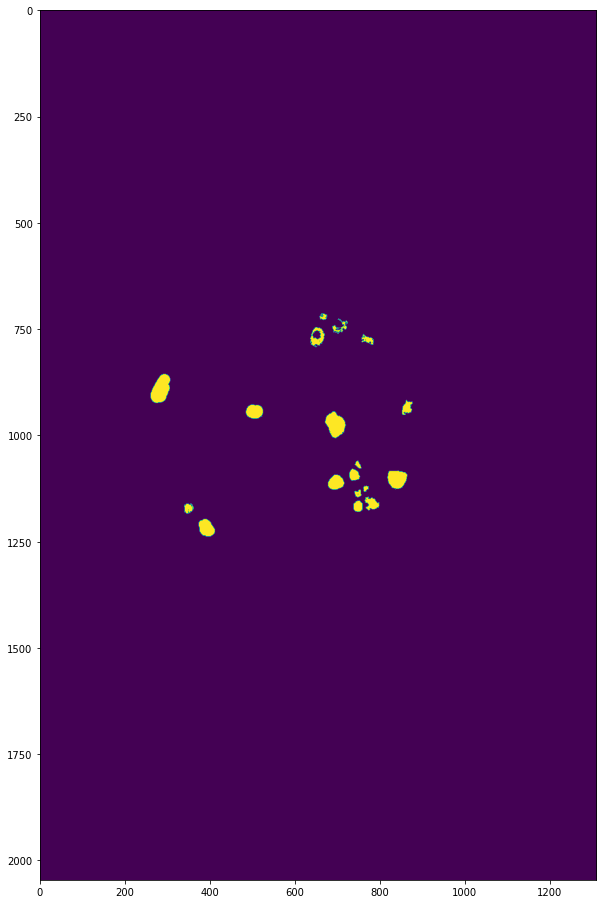

In [44]:
plt.figure(figsize = (16,16))
plt.imshow(rm_so_img_array)

In [22]:
with SessionLocal(expire_on_commit = False) as sess:
    sql_image = sess.query(db_models.Image).filter(db_models.Image.id == uid).one()
    print([_.id for _ in sql_image.experiment_groups])

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [20]:
sql_image.experiment_groups

DetachedInstanceError: Parent instance <Image at 0x1a24196f2e0> is not bound to a Session; lazy load operation of attribute 'experiment_groups' cannot proceed (Background on this error at: http://sqlalche.me/e/14/bhk3)

In [9]:
# add result layer to experiment group

In [10]:
# add measurement to ex

In [11]:
# create experiment

In [12]:
# create experiment groups

In [13]:
# Remove Experiment groups

In [25]:
# Add Images to groups

In [26]:
# Remove Images from groups

In [27]:
# Make measurements

In [28]:
# remove measurements

In [29]:
# create result

In [ ]:
# Remove result